In [1]:
# IPL 

## Importing Libraries and Suppressing Warnings
* This code imports the pandas and numpy libraries and suppresses any warnings generated during execution.

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

## Loading CSV Files into DataFrames
* This code loads five different CSV files into pandas DataFrames for analysis.

In [5]:
matches = pd.read_csv(r"C:\Users\mdimr\Downloads\matches(1).csv")
deliveries = pd.read_csv(r"C:\Users\mdimr\Downloads\Ipl pred\deliveries.csv")
ballbyball=pd.read_csv(r"C:\Users\mdimr\Downloads\ballbyball(1).csv")
auction=pd.read_csv(r"C:\Users\mdimr\Downloads\Ipl pred\auction.csv")
ipl_data=pd.read_csv(r"C:\Users\mdimr\Downloads\ipl_data.csv")

## Imputing Missing Values in DataFrames
* This code imputes missing values in the datasets using forward-fill for continuous data and mode for categorical data.

In [6]:
# Using forward-fill (ffill) and mode where applicable
def impute_missing_values(df):
    # Forward fill for continuous data
    df.fillna(method='ffill', inplace=True)
    
    # Impute with mode for categorical data
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].mode()[0], inplace=True)
    return df

# Impute missing values for each dataset
matches = impute_missing_values(matches)
deliveries = impute_missing_values(deliveries)
ballbyball = impute_missing_values(ballbyball)
auction = impute_missing_values(auction)
ipl_data = impute_missing_values(ipl_data)

## Analyzing Cricket Match Data
* This code prints the top 5 most common venues, average win margin by teams, top 5 teams with the most wins, and toss decision counts from the match dataset.

In [10]:
print("Top 5 most common venues:")
print(matches['venue'].value_counts().head(5))

print("\nAverage win margin for teams:")
print(matches.groupby('winner')['win_by_runs'].mean().sort_values(ascending=False).head(5))

print("\nTop 5 teams with the most wins:")
print(matches['winner'].value_counts().head(5))

print("\nToss decisions analysis:")
print(matches['toss_decision'].value_counts())



Top 5 most common venues:
Eden Gardens                                 77
M Chinnaswamy Stadium                        73
Wankhede Stadium                             73
Feroz Shah Kotla                             67
Rajiv Gandhi International Stadium, Uppal    56
Name: venue, dtype: int64

Average win margin for teams:
winner
Chennai Super Kings            17.780000
Mumbai Indians                 16.513274
Royal Challengers Bangalore    14.904762
Deccan Chargers                14.517241
Rising Pune Supergiant         12.300000
Name: win_by_runs, dtype: float64

Top 5 teams with the most wins:
Mumbai Indians                 113
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Name: winner, dtype: int64

Toss decisions analysis:
field    463
bat      293
Name: toss_decision, dtype: int64


## Analyzing Deliveries Dataset
* This code analyzes the deliveries dataset by identifying top bowlers with most wickets, common dismissals, top batsmen with most runs, average run rate per over, and extra runs statistics.

In [ ]:
# 2. Deliveries dataset analysis
print("\nTop 5 bowlers with the most wickets:")
print(deliveries['bowler'].value_counts().head(5))

print("\nMost common dismissals:")
print(deliveries['dismissal_kind'].value_counts())

print("\nTop 5 batsmen with the most runs:")
runs_per_batsman = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)
print(runs_per_batsman.head(5))

print("\nRun rate per over:")
deliveries['over'] = deliveries['over'].astype(int)
run_rate = deliveries.groupby('over')['total_runs'].mean()
print(run_rate)

print("\nExtras analysis:")
print(deliveries['extra_runs'].value_counts().head(5))

## Analyzing Ball-by-Ball Dataset
* This code analyzes the ball-by-ball dataset by identifying highest scoring matches, top partnerships, average runs per over, and the most runs conceded by a bowler in an innings.



In [16]:
# 3. Ball-by-ball dataset analysis

# Highest scoring matches analysis
print("\nHighest scoring matches:")
print(ballbyball.groupby('ID')['total_run'].sum().sort_values(ascending=False).head(5))

# Top partnerships (batsman + non-striker)
print("\nTop partnerships (batsman + non-striker):")
ballbyball['partnership'] = ballbyball['batter'] + ' & ' + ballbyball['non-striker']
print(ballbyball['partnership'].value_counts().head(5))

# Average runs per over
print("\nAverage runs per over:")
average_runs_per_over = ballbyball.groupby('overs')['total_run'].mean()
print(average_runs_per_over)

# Most runs conceded by a bowler in an innings
print("\nMost runs conceded by a bowler in an innings:")
print(ballbyball.groupby('bowler')['total_run'].sum().sort_values(ascending=False).head(5))



Highest scoring matches:
ID
419137     469
1136604    459
1082641    453
1216527    449
335983     447
Name: total_run, dtype: int64

Top partnerships (batsman + non-striker):
AB de Villiers & V Kohli    1031
V Kohli & AB de Villiers    1028
CH Gayle & V Kohli          1006
V Kohli & CH Gayle           967
DA Warner & S Dhawan         935
Name: partnership, dtype: int64

Average runs per over:
overs
0     0.966984
1     1.136741
2     1.276625
3     1.331776
4     1.337838
5     1.341638
6     1.084654
7     1.171316
8     1.214593
9     1.206685
10    1.242287
11    1.268380
12    1.283095
13    1.324262
14    1.374989
15    1.418192
16    1.480522
17    1.580188
18    1.624838
19    1.760284
Name: total_run, dtype: float64

Most runs conceded by a bowler in an innings:
bowler
R Ashwin           4596
DJ Bravo           4436
PP Chawla          4368
RA Jadeja          4114
Harbhajan Singh    4101
Name: total_run, dtype: int64


## Analyzing IPL Data
* This code analyzes the IPL dataset by identifying the number of matches played in each city, average runs scored by batting teams, win distribution by result type, and average required run rate (RRR) by team.

In [20]:
print("\nNumber of matches played in each city:")
print(ipl_data['city'].value_counts().head(5))
print("\nAverage runs scored by each batting team:")
print(ipl_data.groupby('batting_team')['total_runs_x'].mean().sort_values(ascending=False).head(5))
print("\nWin distribution by result type:")
print(ipl_data['result'].value_counts())

print("\nAverage Required Run Rate (RRR) by team:")
print(ipl_data.groupby('batting_team')['rrr'].mean().sort_values().head(5))




Number of matches played in each city:
Mumbai       10704
Kolkata       7781
Delhi         7254
Hyderabad     6502
Chennai       6286
Name: city, dtype: int64

Average runs scored by each batting team:
batting_team
Kings XI Punjab                173.122230
Delhi Capitals                 172.966437
Royal Challengers Bangalore    168.321836
Mumbai Indians                 164.632359
Sunrisers Hyderabad            164.600903
Name: total_runs_x, dtype: float64

Win distribution by result type:
1    38034
0    34138
Name: result, dtype: int64

Average Required Run Rate (RRR) by team:
batting_team
Kolkata Knight Riders     9.158000
Delhi Capitals            9.435565
Chennai Super Kings       9.599283
Delhi Daredevils         10.207588
Mumbai Indians           10.207701
Name: rrr, dtype: float64


## Data Visualization for Cricket Analysis
* This code generates various visualizations for match, deliveries, ball-by-ball, and IPL data, including bar plots, line plots, and pie charts to explore key statistics like most common venues, win margins, bowler performances, and more.

Top 5 most common venues:


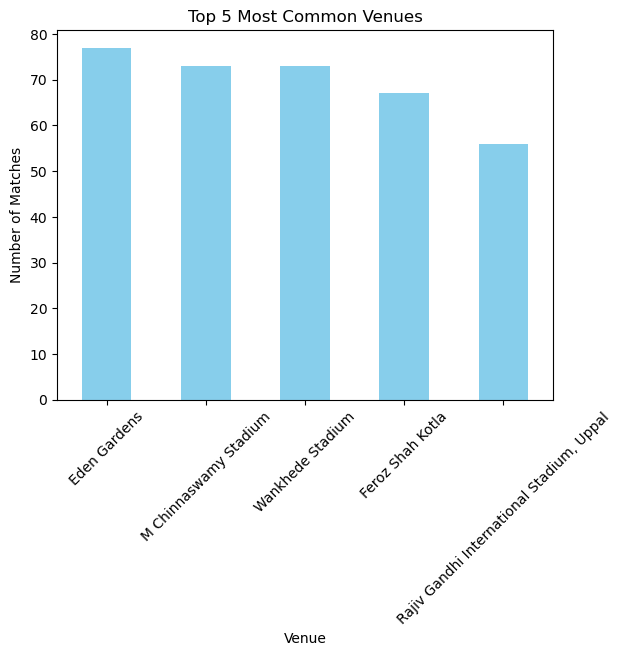


Average win margin for teams:


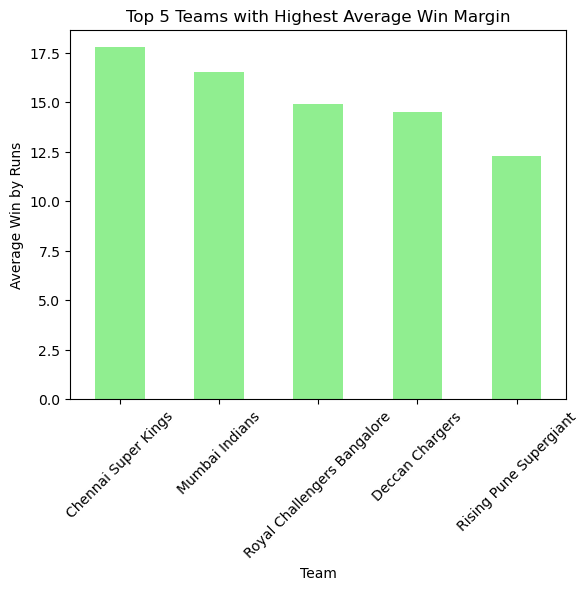


Top 5 teams with the most wins:


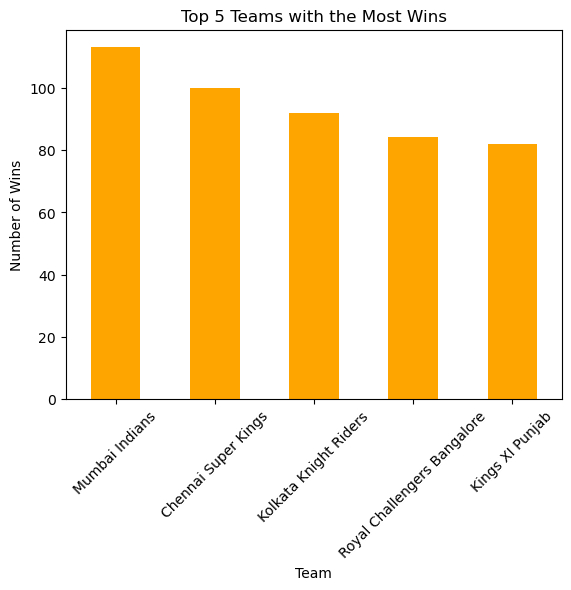


Toss decisions analysis:


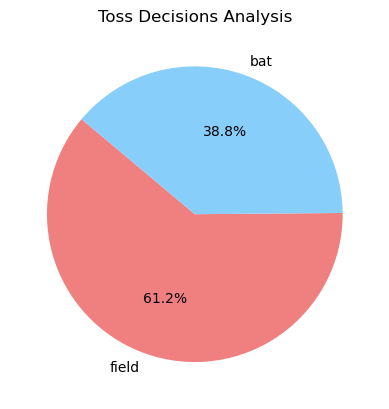


Top 5 bowlers with the most wickets:


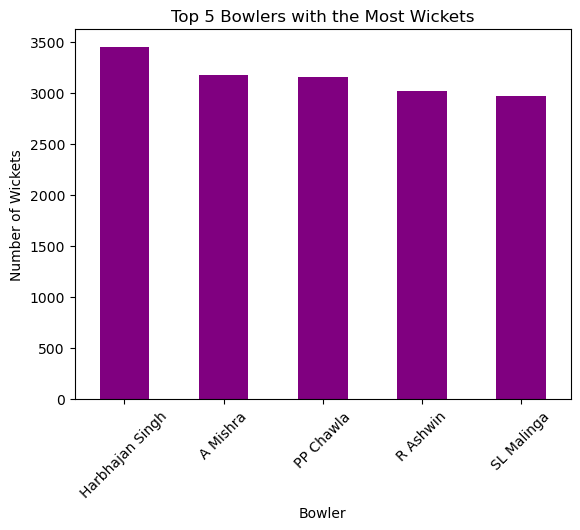


Most common dismissals:


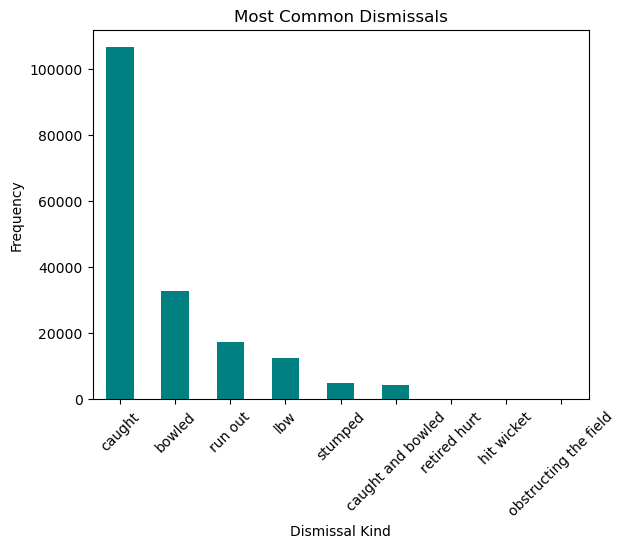


Top 5 batsmen with the most runs:


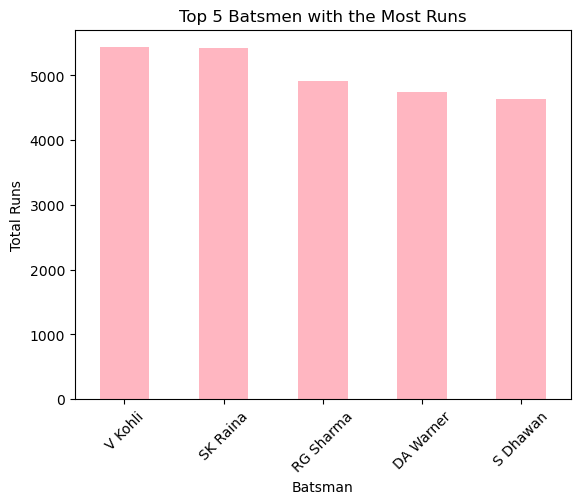


Run rate per over:


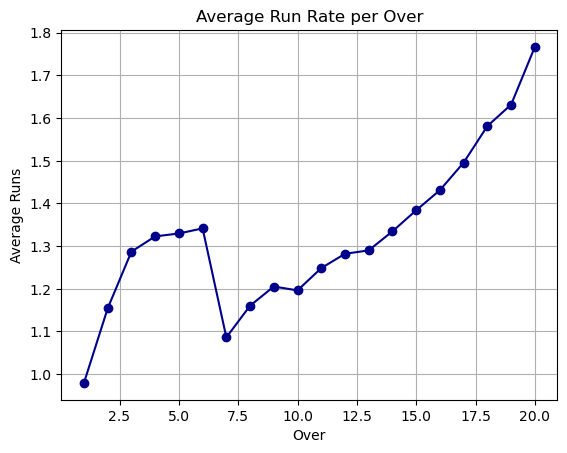


Extras analysis:


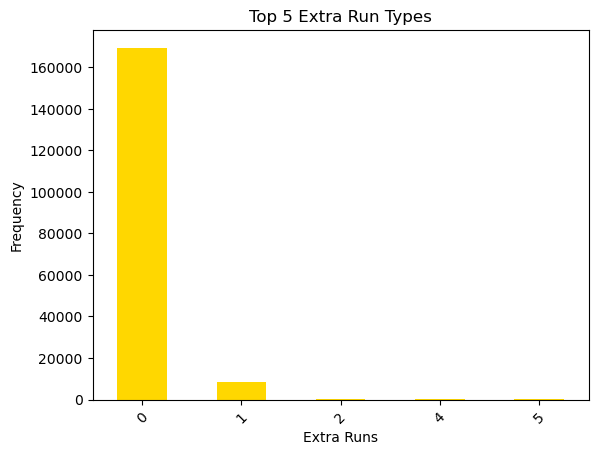


Highest scoring matches:


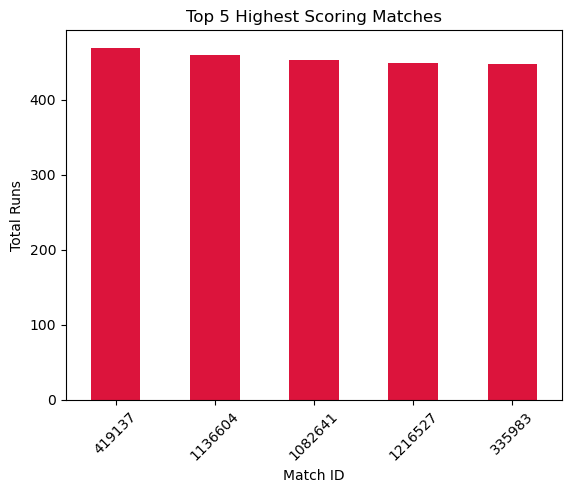


Top partnerships (batsman + non-striker):


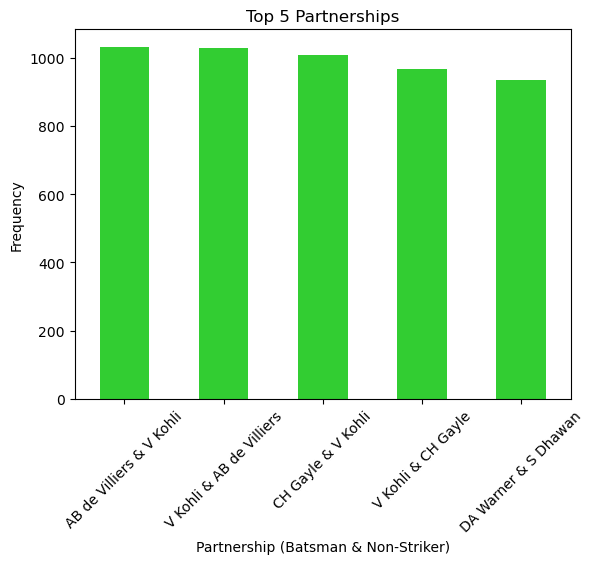


Average runs per over:


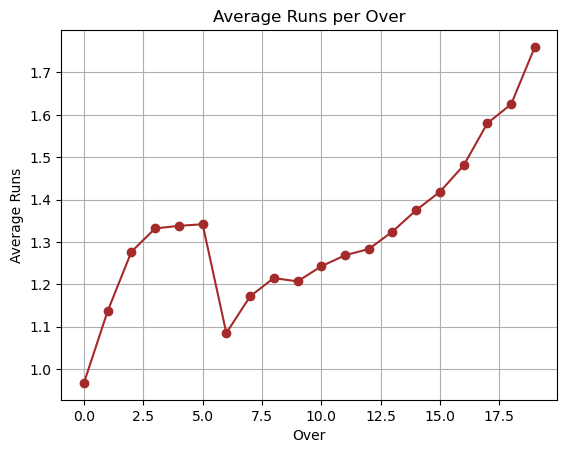


Most runs conceded by a bowler in an innings:


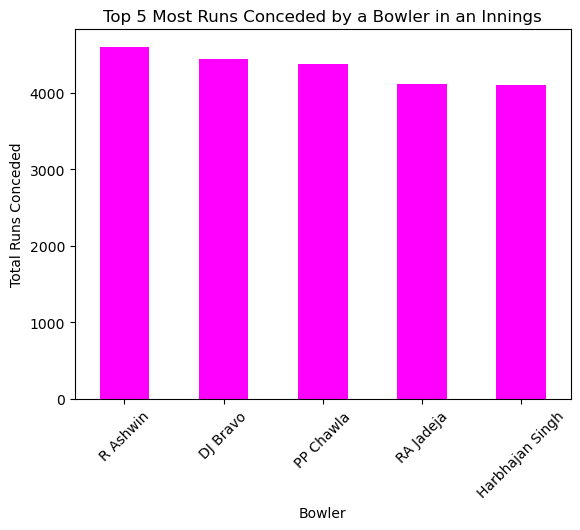


Number of matches played in each city:


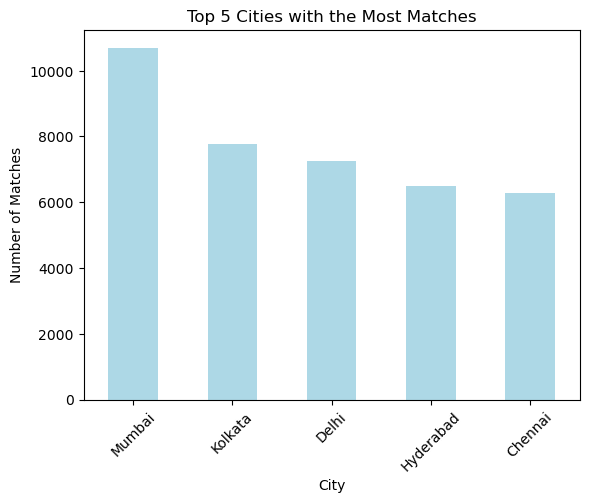


Average runs scored by each batting team:


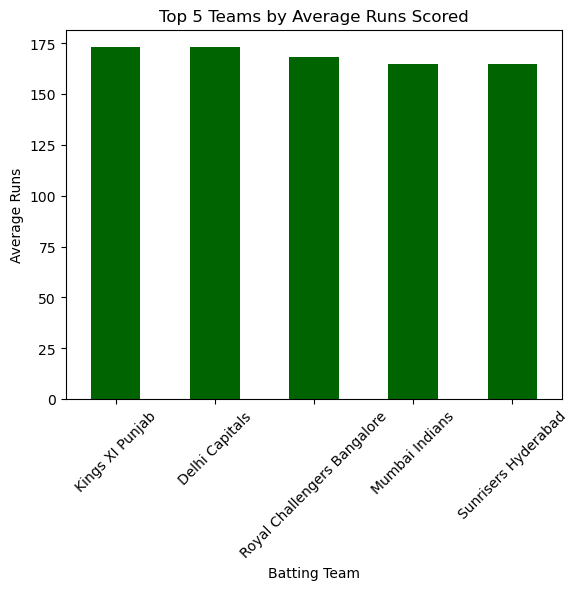


Win distribution by result type:


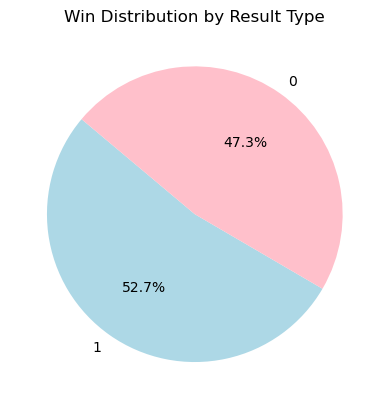


Average Required Run Rate (RRR) by team:


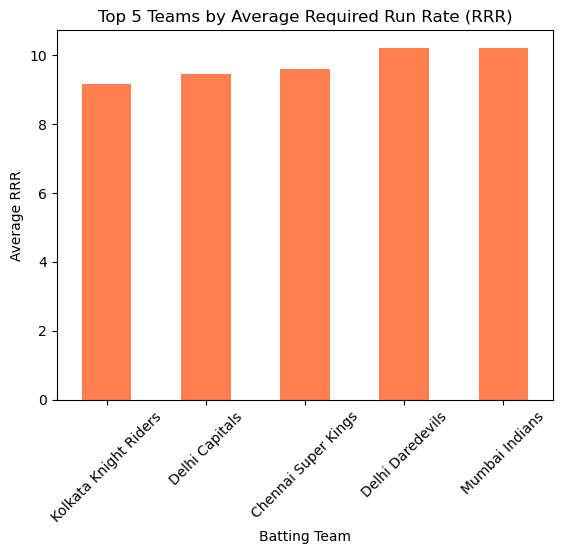

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots display inline
%matplotlib inline

# 1. Matches dataset visualization
print("Top 5 most common venues:")
top_venues = matches['venue'].value_counts().head(5)
top_venues.plot(kind='bar', color='skyblue')
plt.title('Top 5 Most Common Venues')
plt.xlabel('Venue')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()

print("\nAverage win margin for teams:")
avg_win_margin = matches.groupby('winner')['win_by_runs'].mean().sort_values(ascending=False).head(5)
avg_win_margin.plot(kind='bar', color='lightgreen')
plt.title('Top 5 Teams with Highest Average Win Margin')
plt.xlabel('Team')
plt.ylabel('Average Win by Runs')
plt.xticks(rotation=45)
plt.show()

print("\nTop 5 teams with the most wins:")
most_wins = matches['winner'].value_counts().head(5)
most_wins.plot(kind='bar', color='orange')
plt.title('Top 5 Teams with the Most Wins')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.show()

print("\nToss decisions analysis:")
toss_decisions = matches['toss_decision'].value_counts()
toss_decisions.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue'])
plt.title('Toss Decisions Analysis')
plt.ylabel('')
plt.show()

# 2. Deliveries dataset visualization
print("\nTop 5 bowlers with the most wickets:")
top_bowlers = deliveries['bowler'].value_counts().head(5)
top_bowlers.plot(kind='bar', color='purple')
plt.title('Top 5 Bowlers with the Most Wickets')
plt.xlabel('Bowler')
plt.ylabel('Number of Wickets')
plt.xticks(rotation=45)
plt.show()

print("\nMost common dismissals:")
dismissal_kinds = deliveries['dismissal_kind'].value_counts()
dismissal_kinds.plot(kind='bar', color='teal')
plt.title('Most Common Dismissals')
plt.xlabel('Dismissal Kind')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

print("\nTop 5 batsmen with the most runs:")
top_batsmen = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(5)
top_batsmen.plot(kind='bar', color='lightpink')
plt.title('Top 5 Batsmen with the Most Runs')
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.show()

print("\nRun rate per over:")
run_rate = deliveries.groupby('over')['total_runs'].mean()
run_rate.plot(kind='line', marker='o', color='darkblue')
plt.title('Average Run Rate per Over')
plt.xlabel('Over')
plt.ylabel('Average Runs')
plt.grid(True)
plt.show()

print("\nExtras analysis:")
extras = deliveries['extra_runs'].value_counts().head(5)
extras.plot(kind='bar', color='gold')
plt.title('Top 5 Extra Run Types')
plt.xlabel('Extra Runs')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# 3. Ball-by-ball dataset visualization
print("\nHighest scoring matches:")
highest_scoring_matches = ballbyball.groupby('ID')['total_run'].sum().sort_values(ascending=False).head(5)
highest_scoring_matches.plot(kind='bar', color='crimson')
plt.title('Top 5 Highest Scoring Matches')
plt.xlabel('Match ID')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.show()

print("\nTop partnerships (batsman + non-striker):")
top_partnerships = ballbyball['partnership'].value_counts().head(5)
top_partnerships.plot(kind='bar', color='limegreen')
plt.title('Top 5 Partnerships')
plt.xlabel('Partnership (Batsman & Non-Striker)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

print("\nAverage runs per over:")
average_runs_per_over = ballbyball.groupby('overs')['total_run'].mean()
average_runs_per_over.plot(kind='line', marker='o', color='brown')
plt.title('Average Runs per Over')
plt.xlabel('Over')
plt.ylabel('Average Runs')
plt.grid(True)
plt.show()

print("\nMost runs conceded by a bowler in an innings:")
most_runs_conceded = ballbyball.groupby('bowler')['total_run'].sum().sort_values(ascending=False).head(5)
most_runs_conceded.plot(kind='bar', color='magenta')
plt.title('Top 5 Most Runs Conceded by a Bowler in an Innings')
plt.xlabel('Bowler')
plt.ylabel('Total Runs Conceded')
plt.xticks(rotation=45)
plt.show()

# 4. IPL data visualization
print("\nNumber of matches played in each city:")
city_matches = ipl_data['city'].value_counts().head(5)
city_matches.plot(kind='bar', color='lightblue')
plt.title('Top 5 Cities with the Most Matches')
plt.xlabel('City')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()

print("\nAverage runs scored by each batting team:")
avg_runs_team = ipl_data.groupby('batting_team')['total_runs_x'].mean().sort_values(ascending=False).head(5)
avg_runs_team.plot(kind='bar', color='darkgreen')
plt.title('Top 5 Teams by Average Runs Scored')
plt.xlabel('Batting Team')
plt.ylabel('Average Runs')
plt.xticks(rotation=45)
plt.show()

print("\nWin distribution by result type:")
result_distribution = ipl_data['result'].value_counts()
result_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightblue', 'pink', 'lightgreen'])
plt.title('Win Distribution by Result Type')
plt.ylabel('')
plt.show()

print("\nAverage Required Run Rate (RRR) by team:")
avg_rrr_team = ipl_data.groupby('batting_team')['rrr'].mean().sort_values().head(5)
avg_rrr_team.plot(kind='bar', color='coral')
plt.title('Top 5 Teams by Average Required Run Rate (RRR)')
plt.xlabel('Batting Team')
plt.ylabel('Average RRR')
plt.xticks(rotation=45)
plt.show()


## Calculating Total Runs per Match and Inning
* This code calculates the total runs scored in each inning of a match by grouping the deliveries dataset by match_id and inning.

In [3]:
total_score_df = deliveries.groupby(['match_id','inning'])['total_runs'].sum().reset_index()
total_score_df.head()

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183


## Extracting First Inning Scores
* This code filters the total score data to extract the total runs scored in the first inning of each match.

In [4]:
total_score_df_first_inning = total_score_df[total_score_df['inning'] == 1]
total_score_df_first_inning.head()

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157


## Merging Match Data with First Inning Scores
* This code merges the matches dataframe with the first inning scores from total_score_df_first_inning using the match_id to add total runs scored in the first inning to the match dataset.

In [5]:
matches_df = pd.merge(matches,total_score_df_first_inning[['match_id','total_runs']],left_on='id',right_on='match_id')
matches_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157


## Standardizing Team Names
* This code standardizes team names by replacing "Delhi Daredevils" with "Delhi Capitals" and "Deccan Chargers" with "Sunrisers Hyderabad" in both team1 and team2 columns of the matches_df dataframe.

In [7]:
matches_df['team1'] = matches_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
matches_df['team2'] = matches_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

matches_df['team1'] = matches_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
matches_df['team2'] = matches_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

## Defining List of IPL Teams
* This code defines a list of the eight IPL teams: Rajasthan Royals, Chennai Super Kings, Kolkata Knight Riders, Mumbai Indians, Sunrisers Hyderabad, Royal Challengers Bangalore, Kings XI Punjab, and Delhi Capitals.

In [8]:
ipl_teams = [
    'Rajasthan Royals',
    'Chennai Super Kings',
    'Kolkata Knight Riders',
    'Mumbai Indians',
    'Sunrisers Hyderabad',
    'Royal Challengers Bangalore',
    'Kings XI Punjab',
    'Delhi Capitals'
]

## Filtering Matches by IPL Teams
* This code filters the matches_df dataframe to include only matches where team1 and team2 are from the defined list of IPL teams, and then returns the shape of the filtered dataframe.

In [9]:
matches_df = matches_df[matches_df['team1'].isin(ipl_teams)]
matches_df = matches_df[matches_df['team2'].isin(ipl_teams)]
matches_df.shape

(641, 20)

## Filtering Matches without D/L Method
* This code filters the matches_df dataframe to include only matches where the D/L (Duckworth-Lewis) method was not applied (dl_applied == 0).


In [10]:
matches_df = matches_df.loc[matches_df['dl_applied'] == 0]

## Selecting Relevant Columns for Match Analysis
* This code selects and retains only the match_id, city, winner, and total_runs columns from the matches_df dataframe for further analysis.

In [11]:
matches_df = matches_df[['match_id','city','winner','total_runs']]
matches_df.head()

,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,207
4,5,Bangalore,Royal Challengers Bangalore,157
6,7,Mumbai,Mumbai Indians,178
7,8,Indore,Kings XI Punjab,148
9,10,Mumbai,Mumbai Indians,158


## Merging Match Data with Deliveries Data
* This code merges the matches_df dataframe with the deliveries dataframe on match_id, combining match-level information with ball-by-ball delivery data.

In [12]:
df_merged = pd.merge(matches_df,deliveries,on='match_id')
df_merged.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,0,2,2,NaN,NaN,NaN


## Calculating Runs and Wickets Left in a Match
* This code filters the merged dataframe to include only second innings, calculates the current score, runs left, balls left, and wickets left for each match, while also handling player dismissals and filling missing values.

In [13]:
df_merged = df_merged.loc[df_merged['inning'] == 2]

In [14]:
df_merged['current_score'] = df_merged.groupby('match_id')['total_runs_y'].cumsum()

In [15]:
df_merged['runs_left'] = df_merged['total_runs_x'] - df_merged['current_score']

In [16]:
ball_per_over = 6
df_merged['balls_left'] = 126 - (df_merged['over'] * ball_per_over + df_merged['ball'])

In [17]:
# Fill NaN values with forward fill for 'player_dismissed' column
df_merged['player_dismissed'].fillna(method='ffill', inplace=True)

# Converting the column to 0 (no dismissal) and 1 (dismissal) using a lambda function
df_merged['player_dismissed'] = df_merged['player_dismissed'].apply(lambda x: 0 if x == 0 else 1)

# Calculating cumulative sum for wickets per match
wickets = df_merged.groupby('match_id')['player_dismissed'].cumsum().values

# Assuming a total of 10 wickets in the game
total_wickets = 10

# Calculating the number of wickets left in the game
df_merged['wickets_left'] = total_wickets - wickets

# Showing the result
df_merged.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,1,NaN,NaN,1,206,119,9
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,1,NaN,NaN,1,206,118,8
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,1,NaN,NaN,1,206,117,7
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,1,NaN,NaN,3,204,116,6
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,1,NaN,NaN,7,200,115,5


## Feature Engineering for Match Outcome Prediction
* This code calculates the current run rate (CRR), required run rate (RRR), and match result (win/lose), creates a final dataframe for model building, handles missing values, and fills them for both categorical and numerical columns.

In [18]:
# current run rate (crr = runs/overs)
total_balls = 120
df_merged['crr'] = (df_merged['current_score'] * ball_per_over) / (total_balls - df_merged['balls_left'])

In [19]:
# required run rate (rrr = (Runs required to win / Balls Remaining  ) x 6)
df_merged['rrr'] = (df_merged['runs_left']*6) / df_merged['balls_left']

In [20]:
# match result: 0-lose | 1-win
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

df_merged['result'] = df_merged.apply(result,axis=1)

In [21]:
# final df for model building
df = df_merged[['batting_team','bowling_team','city','runs_left','balls_left','wickets_left','total_runs_x','crr','rrr','result']]

In [22]:
df = df.sample(df.shape[0])

In [23]:
df.isna().sum()

batting_team      0
bowling_team      0
city            832
runs_left         0
balls_left        0
wickets_left      0
total_runs_x      0
crr               0
rrr               7
result            0
dtype: int64

## Filtering Data and Exploring Unique Values
* This code prints the list of unique cities in the dataset, filters out rows with zero balls left, and displays the unique batting teams in the dataframe after the filtering.

In [24]:
df['city'].fillna(df['city'].mode()[0], inplace=True)

# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Fill missing values in numerical columns using forward fill
df[numerical_columns] = df[numerical_columns].fillna(method='ffill')

# Display the DataFrame to verify changes
df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
74636,Sunrisers Hyderabad,Delhi Daredevils,Delhi,76,83,-28,114,6.162162,5.493976,1
46053,Kolkata Knight Riders,Rajasthan Royals,Kolkata,128,118,8,132,12.000000,6.508475,1
74851,Chennai Super Kings,Royal Challengers Bangalore,Chennai,161,113,2,165,3.428571,8.548673,1
118797,Kings XI Punjab,Royal Challengers Bangalore,Chandigarh,61,37,-75,175,8.240964,9.891892,0
6572,Kolkata Knight Riders,Mumbai Indians,Kolkata,21,13,-102,173,8.523364,9.692308,0


In [25]:
cities = df['city'].unique().tolist()
print(cities)

['Delhi', 'Kolkata', 'Chennai', 'Chandigarh', 'Bangalore', 'Hyderabad', 'Durban', 'Pune', 'Visakhapatnam', 'Mumbai', 'Jaipur', 'Ranchi', 'Abu Dhabi', 'Raipur', 'Bengaluru', 'Cape Town', 'Mohali', 'Centurion', 'Dharamsala', 'Port Elizabeth', 'East London', 'Cuttack', 'Kimberley', 'Johannesburg', 'Nagpur', 'Ahmedabad', 'Sharjah', 'Indore', 'Bloemfontein']


In [26]:
df = df.loc[df['balls_left'] != 0]
df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
74636,Sunrisers Hyderabad,Delhi Daredevils,Delhi,76,83,-28,114,6.162162,5.493976,1
46053,Kolkata Knight Riders,Rajasthan Royals,Kolkata,128,118,8,132,12.000000,6.508475,1
74851,Chennai Super Kings,Royal Challengers Bangalore,Chennai,161,113,2,165,3.428571,8.548673,1
118797,Kings XI Punjab,Royal Challengers Bangalore,Chandigarh,61,37,-75,175,8.240964,9.891892,0
6572,Kolkata Knight Riders,Mumbai Indians,Kolkata,21,13,-102,173,8.523364,9.692308,0


In [64]:
df['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Kolkata Knight Riders',
       'Chennai Super Kings', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Delhi Daredevils', 'Deccan Chargers', 'Delhi Capitals',
       'Mumbai Indians'], dtype=object)

## Data Preprocessing for Model Training
* This code defines predictors and the target variable, splits the data into training and testing sets, separates categorical and numerical columns, scales numerical features using StandardScaler, and applies OneHotEncoding to categorical features, combining the results for model training.

In [27]:
# Define the predictors (X) and target variable (y)

X = df.drop(columns=['result'])

y = df['result']

In [32]:
# Split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(54129, 9) (54129,)
(18043, 9) (18043,)


In [33]:
# Separating Categorical and Numerical Columns

X_train_cat = X_train.select_dtypes(include=['object'])
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])



X_test_cat = X_test.select_dtypes(include=['object'])
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

In [34]:
# Rescaling numerical features
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_num_transformed = pd.DataFrame(std_scaler.fit_transform(X_train_num),
                                    columns = std_scaler.get_feature_names_out(),
                                    index = X_train_num.index)

X_train_num_transformed.head()

,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr
69562,-0.554310,-0.297342,-0.261489,-1.013739,-0.472936,-0.218129
83996,0.067371,-0.297342,-0.319761,0.423076,-0.041831,0.035082
36589,1.050027,1.387718,1.399283,-0.500591,-1.823256,-0.173167
73203,-0.173280,-0.387614,-0.348898,-0.603221,-0.854772,-0.021768
98304,1.029973,0.876181,0.903965,0.662545,0.589430,-0.071458


In [35]:
# Let's now analyse the properties of 'std_scaler'

print("Number of Numerical Features:", std_scaler.n_features_in_)
print("Output Feature Names:", std_scaler.get_feature_names_out())
print("Mean of each column:", std_scaler.mean_)
print("Std of each column:", np.sqrt(std_scaler.var_))

Number of Numerical Features: 6
Output Feature Names: ['runs_left' 'balls_left' 'wickets_left' 'total_runs_x' 'crr' 'rrr']
Mean of each column: [ 92.64058083  62.88165309 -49.02534686 165.63293244   7.43886744
  10.38169694]
Std of each column: [49.86480874 33.23323695 34.32139184 29.23131032  2.28499973 13.85973055]


In [36]:
# OneHotEncoding the categorical features
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse_output=False,
                               handle_unknown="ignore")

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_cat_tansformed = pd.DataFrame(onehot_encoder.fit_transform(X_train_cat),
                               columns=onehot_encoder.get_feature_names_out(),
                               index = X_train_cat.index)

print("Shape of Data before Transformation:", X_train_cat.shape)
print("Shape of Data after Transformation:", X_train_cat_tansformed.shape)

Shape of Data before Transformation: (54129, 3)
Shape of Data after Transformation: (54129, 49)


In [37]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_tansformed], axis=1)

X_train_transformed.head()

,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,batting_team_Chennai Super Kings,batting_team_Deccan Chargers,batting_team_Delhi Capitals,batting_team_Delhi Daredevils,...,city_Kolkata,city_Mohali,city_Mumbai,city_Nagpur,city_Port Elizabeth,city_Pune,city_Raipur,city_Ranchi,city_Sharjah,city_Visakhapatnam
69562,-0.554310,-0.297342,-0.261489,-1.013739,-0.472936,-0.218129,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83996,0.067371,-0.297342,-0.319761,0.423076,-0.041831,0.035082,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36589,1.050027,1.387718,1.399283,-0.500591,-1.823256,-0.173167,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73203,-0.173280,-0.387614,-0.348898,-0.603221,-0.854772,-0.021768,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98304,1.029973,0.876181,0.903965,0.662545,0.589430,-0.071458,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [38]:
X_test_num_transformed = pd.DataFrame(std_scaler.fit_transform(X_test_num),
                                    columns = std_scaler.get_feature_names_out(),
                                    index = X_test_num.index)

X_test_num_transformed.head()

,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr
64966,0.956989,-0.024594,0.002515,0.839742,-1.001807,0.252632
86992,0.058216,0.605055,0.612179,-0.688408,0.298058,-0.259679
57547,1.376417,1.114771,1.076684,0.330359,-1.432371,-0.045541
61092,-0.121539,0.425155,0.408957,-1.163832,-0.511802,-0.272422
126043,-0.501021,-0.624260,-0.665212,0.228482,0.284250,-0.052332


In [39]:
X_test_cat_tansformed = pd.DataFrame(onehot_encoder.fit_transform(X_test_cat),
                               columns=onehot_encoder.get_feature_names_out(),
                               index = X_test_cat.index)

print("Shape of Data before Transformation:", X_test_cat.shape)
print("Shape of Data after Transformation:", X_test_cat_tansformed.shape)

Shape of Data before Transformation: (18043, 3)
Shape of Data after Transformation: (18043, 49)


In [40]:
X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_tansformed], axis=1)

X_test_transformed.head()

,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,batting_team_Chennai Super Kings,batting_team_Deccan Chargers,batting_team_Delhi Capitals,batting_team_Delhi Daredevils,...,city_Kolkata,city_Mohali,city_Mumbai,city_Nagpur,city_Port Elizabeth,city_Pune,city_Raipur,city_Ranchi,city_Sharjah,city_Visakhapatnam
64966,0.956989,-0.024594,0.002515,0.839742,-1.001807,0.252632,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86992,0.058216,0.605055,0.612179,-0.688408,0.298058,-0.259679,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
57547,1.376417,1.114771,1.076684,0.330359,-1.432371,-0.045541,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61092,-0.121539,0.425155,0.408957,-1.163832,-0.511802,-0.272422,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126043,-0.501021,-0.624260,-0.665212,0.228482,0.284250,-0.052332,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Overview of Imports for Model Training Pipelines
* Essential imports for creating machine learning pipelines, scaling data, and performing model training with hyperparameter tuning using GridSearchCV.

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

## Setting Up MLflow for Experiment Tracking


In [38]:
import mlflow

# Set the tracking URI to the local server (default)
mlflow.set_tracking_uri("http://127.0.0.1:5000")

In [39]:
import mlflow

mlflow.set_experiment("IPL Prediction")

<Experiment: artifact_location='mlflow-artifacts:/212700372492253296', creation_time=1727545122000, experiment_id='212700372492253296', last_update_time=1727545122000, lifecycle_stage='active', name='IPL Prediction', tags={}>

## Machine Learning Model Pipelines Setup

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb

# Define pipelines without any scaling
pipelines = {
    'logistic_regression': Pipeline([
        ('classifier', LogisticRegression(max_iter=1000))
    ]),
    
    'naive_bayes': Pipeline([
        ('classifier', GaussianNB())
    ]),
    
    'decision_tree': Pipeline([
        ('classifier', DecisionTreeClassifier())
    ]),
    
    'random_forest': Pipeline([
        ('classifier', RandomForestClassifier())
    ])
    
    
}

## Hyperparameter Grid for Model Tuning

In [41]:
param_grids = {
    'logistic_regression': {
        'classifier__C': [10, 100],  # Regularization strength
        'classifier__penalty': ['l1'],  # Penalties
        'classifier__solver': ['liblinear']  # Solvers
    },
    
    'naive_bayes': {
        'classifier__var_smoothing': [1e-9, 1e-8, 1e-7]  # Variance smoothing parameter for GaussianNB
    },
    
    'decision_tree': {
        'classifier__max_depth': [None, 10, 20, 30],  # Depth of the tree
        'classifier__criterion': ['gini', 'entropy']  # Splitting criteria
    },
    
    'random_forest': {
        'classifier__n_estimators': [100, 200, 500],  # Number of trees in the forest
        'classifier__max_depth': [None],  # Depth of each tree
        'classifier__criterion': ['gini']  # Splitting criteria
    }
}

## Setting Up Caching for Intermediate Results with Joblib

In [42]:
import joblib
from joblib import Memory

import os


# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

## Model Training and Hyperparameter Tuning with MLflow Integration:
* Automates model training, hyperparameter optimization, performance tracking, and saving the best models using GridSearchCV and MLflow.

In [44]:
import os
import joblib
import mlflow
from sklearn.model_selection import GridSearchCV
import numpy as np
import time
from sklearn.utils import parallel_backend

# Start MLflow autologging
mlflow.autolog()  # <-- This line is added here

dev = "Ayesha"
best_models = {}

# Create directory for best models if it doesn't exist
if not os.path.exists('best_models'):
    os.makedirs('best_models')

# Loop through each algorithm pipeline
for algo in pipelines.keys():
    print("*" * 10, algo, "*" * 10)
    
    # Define the GridSearchCV
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=3, 
                               scoring='accuracy', 
                               return_train_score=True,
                               verbose=3)  # Increased verbosity for detailed logging

    # Fit the model with context manager to handle potential timeout
    start_fit_time = time.time()
    try:
        with parallel_backend('threading', n_jobs=-1):  # Use threading for better memory management
            grid_search.fit(X_train_transformed, y_train)  # Use your vectorized data
    except Exception as e:
        print(f"Error fitting model {algo}: {e}")
        continue  # Skip to the next algorithm
    end_fit_time = time.time()

    # Predict using the best model
    start_predict_time = time.time()
    try:
        y_pred = grid_search.predict(X_test_transformed)  # Use your vectorized data
    except Exception as e:
        print(f"Error predicting with model {algo}: {e}")
        continue  # Skip to the next algorithm
    end_predict_time = time.time()

    # Save the best model
    try:
        model_path = f'best_models/{algo}.pkl'
        joblib.dump(grid_search.best_estimator_, model_path)
        model_size = os.path.getsize(model_path)
    except Exception as e:
        print(f"Error saving model {algo}: {e}")
        continue  # Skip to the next algorithm

    # Print model performance metrics
    test_score = grid_search.score(X_test_transformed, y_test)  # Use the test set directly
    print('Test Score: ', test_score)
    print("Fit Time: ", end_fit_time - start_fit_time)
    print("Predict Time: ", end_predict_time - start_predict_time)
    print("Model Size: ", model_size)
    print()

    # Log the experiment run with MLflow (autologging should cover this)
    try:
        with mlflow.start_run(run_name=f"IPL_Prediction {algo}"):  # Dynamically set the run name
            mlflow.set_tag("developer", dev)
            mlflow.set_tag("team", "data_science")
            mlflow.set_tag("model_type", algo)  # Set model_type based on the current algorithm
            mlflow.log_param("algorithm", algo)
            mlflow.log_param("hyperparameter_grid", param_grids[algo])
            mlflow.log_param("best_hyperparameter", grid_search.best_params_)
            # The metrics and model should already be logged by autolog
    except Exception as e:
        print(f"Error logging model with MLflow for {algo}: {e}")

2024/09/29 00:37:27 WARNING mlflow.utils.autologging_utils: MLflow sklearn autologging is known to be compatible with 0.24.1 <= scikit-learn <= 1.5.1, but the installed version is 1.5.2. If you encounter errors during autologging, try upgrading / downgrading scikit-learn to a compatible version, or try upgrading MLflow.
2024/09/29 00:37:28 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/09/29 00:37:28 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.


********** logistic_regression **********


2024/09/29 00:37:28 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet

2024/09/29 00:37:28 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'f6ed58e

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV 2/3] END classifier__C=10, classifier__penalty=l1, classifier__solver=liblinear;, score=(train=0.793, test=0.782) total time=   9.1s
[CV 3/3] END classifier__C=10, classifier__penalty=l1, classifier__solver=liblinear;, score=(train=0.789, test=0.792) total time=  14.1s
[CV 1/3] END classifier__C=100, classifier__penalty=l1, classifier__solver=liblinear;, score=(train=0.789, test=0.794) total time=  16.3s
[CV 1/3] END classifier__C=10, classifier__penalty=l1, classifier__solver=liblinear;, score=(train=0.789, test=0.794) total time=  17.6s
[CV 2/3] END classifier__C=100, classifier__penalty=l1, classifier__solver=liblinear;, score=(train=0.793, test=0.782) total time=  10.5s
[CV 3/3] END classifier__C=100, classifier__penalty=l1, classifier__solver=liblinear;, score=(train=0.789, test=0.792) total time=   9.0s


2024/09/29 00:38:35 INFO mlflow.sklearn.utils: Logging the 5 best runs, no runs will be omitted.
2024/09/29 00:38:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run popular-hare-394 at: http://127.0.0.1:5000/#/experiments/212700372492253296/runs/585080d6f5114e58930198a26f8cd464.
2024/09/29 00:38:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/212700372492253296.
2024/09/29 00:38:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run hilarious-shark-258 at: http://127.0.0.1:5000/#/experiments/212700372492253296/runs/793aee2acaee45e2bfc97b32396048c9.
2024/09/29 00:38:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/212700372492253296.
2024/09/29 00:38:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run youthful-steed-5 at: http://127.0.0.1:5000/#/experiments/212700372492253296/runs/f6ed58e56b5e4ad0a90b5c21f75f69fa.
2024/09/29 00:38:36 INFO mlflow

Test Score:  0.7942138225350551
Fit Time:  68.27259182929993
Predict Time:  4.146806240081787
Model Size:  3121



2024/09/29 00:38:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run IPL_Prediction logistic_regression at: http://127.0.0.1:5000/#/experiments/212700372492253296/runs/f592c565e1374ecd9e7ef5fcef43e04a.
2024/09/29 00:38:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/212700372492253296.
2024/09/29 00:38:41 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '0b03a382f28f4cde8a93ed7a45ae7962', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


********** naive_bayes **********
Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END classifier__var_smoothing=1e-08;, score=(train=0.718, test=0.714) total time=   0.3s
[CV 2/3] END classifier__var_smoothing=1e-09;, score=(train=0.720, test=0.721) total time=   0.4s
[CV 1/3] END classifier__var_smoothing=1e-09;, score=(train=0.718, test=0.714) total time=   0.3s
[CV 3/3] END classifier__var_smoothing=1e-09;, score=(train=0.726, test=0.723) total time=   0.4s
[CV 2/3] END classifier__var_smoothing=1e-08;, score=(train=0.720, test=0.721) total time=   0.3s
[CV 3/3] END classifier__var_smoothing=1e-08;, score=(train=0.726, test=0.723) total time=   0.3s
[CV 1/3] END classifier__var_smoothing=1e-07;, score=(train=0.718, test=0.714) total time=   0.3s
[CV 2/3] END classifier__var_smoothing=1e-07;, score=(train=0.720, test=0.721) total time=   0.4s
[CV 3/3] END classifier__var_smoothing=1e-07;, score=(train=0.726, test=0.723) total time=   0.1s


2024/09/29 00:39:07 INFO mlflow.sklearn.utils: Logging the 5 best runs, no runs will be omitted.
2024/09/29 00:39:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run stylish-bug-233 at: http://127.0.0.1:5000/#/experiments/212700372492253296/runs/1e56239b604548238fad3da1cdc9401d.
2024/09/29 00:39:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run honorable-cow-49 at: http://127.0.0.1:5000/#/experiments/212700372492253296/runs/2162baf06bc847c39f3440f59db6826c.
2024/09/29 00:39:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/212700372492253296.
2024/09/29 00:39:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/212700372492253296.
2024/09/29 00:39:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run capricious-wren-836 at: http://127.0.0.1:5000/#/experiments/212700372492253296/runs/85d00179f8924f0bbc25a6b74025840b.
2024/09/29 00:39:08 INFO mlflow.

Test Score:  0.7193925622124924
Fit Time:  27.554924488067627
Predict Time:  4.103707313537598
Model Size:  4341



2024/09/29 00:39:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run IPL_Prediction naive_bayes at: http://127.0.0.1:5000/#/experiments/212700372492253296/runs/6f593321f2a245b080b91a0b4ea4e9ca.
2024/09/29 00:39:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/212700372492253296.
2024/09/29 00:39:13 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '74476c912d4a42d3826b10ed51a7bbb5', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


********** decision_tree **********
Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 1/3] END classifier__criterion=gini, classifier__max_depth=10;, score=(train=0.867, test=0.863) total time=   1.1s
[CV 3/3] END classifier__criterion=gini, classifier__max_depth=None;, score=(train=1.000, test=0.986) total time=   1.5s
[CV 1/3] END classifier__criterion=gini, classifier__max_depth=None;, score=(train=1.000, test=0.982) total time=   1.6s
[CV 2/3] END classifier__criterion=gini, classifier__max_depth=None;, score=(train=1.000, test=0.982) total time=   1.6s
[CV 2/3] END classifier__criterion=gini, classifier__max_depth=10;, score=(train=0.879, test=0.865) total time=   1.1s
[CV 3/3] END classifier__criterion=gini, classifier__max_depth=10;, score=(train=0.864, test=0.861) total time=   1.1s
[CV 2/3] END classifier__criterion=gini, classifier__max_depth=20;, score=(train=0.992, test=0.977) total time=   1.5s
[CV 1/3] END classifier__criterion=gini, classifier__max_depth=20

2024/09/29 00:39:51 INFO mlflow.sklearn.utils: Logging the 5 best runs, 3 runs will be omitted.
2024/09/29 00:39:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run unique-trout-38 at: http://127.0.0.1:5000/#/experiments/212700372492253296/runs/8de837cdc14d4b8e93a93683a06eb787.
2024/09/29 00:39:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/212700372492253296.
2024/09/29 00:39:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run gentle-snipe-586 at: http://127.0.0.1:5000/#/experiments/212700372492253296/runs/3b8cef5205584b2b8600b7a6bae28313.
2024/09/29 00:39:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/212700372492253296.
2024/09/29 00:39:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run unleashed-tern-895 at: http://127.0.0.1:5000/#/experiments/212700372492253296/runs/cfc79b83d2454a7595f8964aea4bb27d.
2024/09/29 00:39:52 INFO mlflow.tr

Test Score:  0.9873635204788561
Fit Time:  39.82605791091919
Predict Time:  4.1239519119262695
Model Size:  201735



2024/09/29 00:39:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run IPL_Prediction decision_tree at: http://127.0.0.1:5000/#/experiments/212700372492253296/runs/93dadb6c910a4864b968552f4c0b66b4.
2024/09/29 00:39:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/212700372492253296.
2024/09/29 00:39:58 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '4b291fefe34348b697b53554cc8abe8b', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


********** random_forest **********
Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END classifier__criterion=gini, classifier__max_depth=None, classifier__n_estimators=100;, score=(train=1.000, test=0.996) total time=  25.5s
[CV 2/3] END classifier__criterion=gini, classifier__max_depth=None, classifier__n_estimators=100;, score=(train=1.000, test=0.997) total time=  26.0s
[CV 3/3] END classifier__criterion=gini, classifier__max_depth=None, classifier__n_estimators=100;, score=(train=1.000, test=0.996) total time=  26.0s
[CV 1/3] END classifier__criterion=gini, classifier__max_depth=None, classifier__n_estimators=200;, score=(train=1.000, test=0.996) total time=  50.9s
[CV 3/3] END classifier__criterion=gini, classifier__max_depth=None, classifier__n_estimators=200;, score=(train=1.000, test=0.997) total time=  50.3s
[CV 2/3] END classifier__criterion=gini, classifier__max_depth=None, classifier__n_estimators=200;, score=(train=1.000, test=0.997) total time=  51.3s

2024/09/29 00:44:58 INFO mlflow.sklearn.utils: Logging the 5 best runs, no runs will be omitted.
2024/09/29 00:45:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run serious-cub-968 at: http://127.0.0.1:5000/#/experiments/212700372492253296/runs/e051ddaf17c84e8493e241fee1765102.
2024/09/29 00:45:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/212700372492253296.
2024/09/29 00:45:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run placid-smelt-267 at: http://127.0.0.1:5000/#/experiments/212700372492253296/runs/eabc3173c1fd48c38fb801fd3012a820.
2024/09/29 00:45:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/212700372492253296.
2024/09/29 00:45:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run exultant-jay-505 at: http://127.0.0.1:5000/#/experiments/212700372492253296/runs/c81e5ba3350d4711a57829b95252415d.
2024/09/29 00:45:00 INFO mlflow.tra

Test Score:  0.9972288422102754
Fit Time:  302.755779504776
Predict Time:  11.068263530731201
Model Size:  207610911



2024/09/29 00:45:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run IPL_Prediction random_forest at: http://127.0.0.1:5000/#/experiments/212700372492253296/runs/98f4387b04a34eb586d8c27777c42c66.
2024/09/29 00:45:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/212700372492253296.


In [46]:
import mlflow

# Search for all experiments
experiments = mlflow.search_experiments()

# Print the details of each experiment
for exp in experiments:
    print(f"Experiment Name: {exp.name}, Experiment ID: {exp.experiment_id}")


Experiment Name: Model_Training_Experiment, Experiment ID: 142028550761552599
Experiment Name: IPL Prediction, Experiment ID: 212700372492253296
Experiment Name: Default, Experiment ID: 0


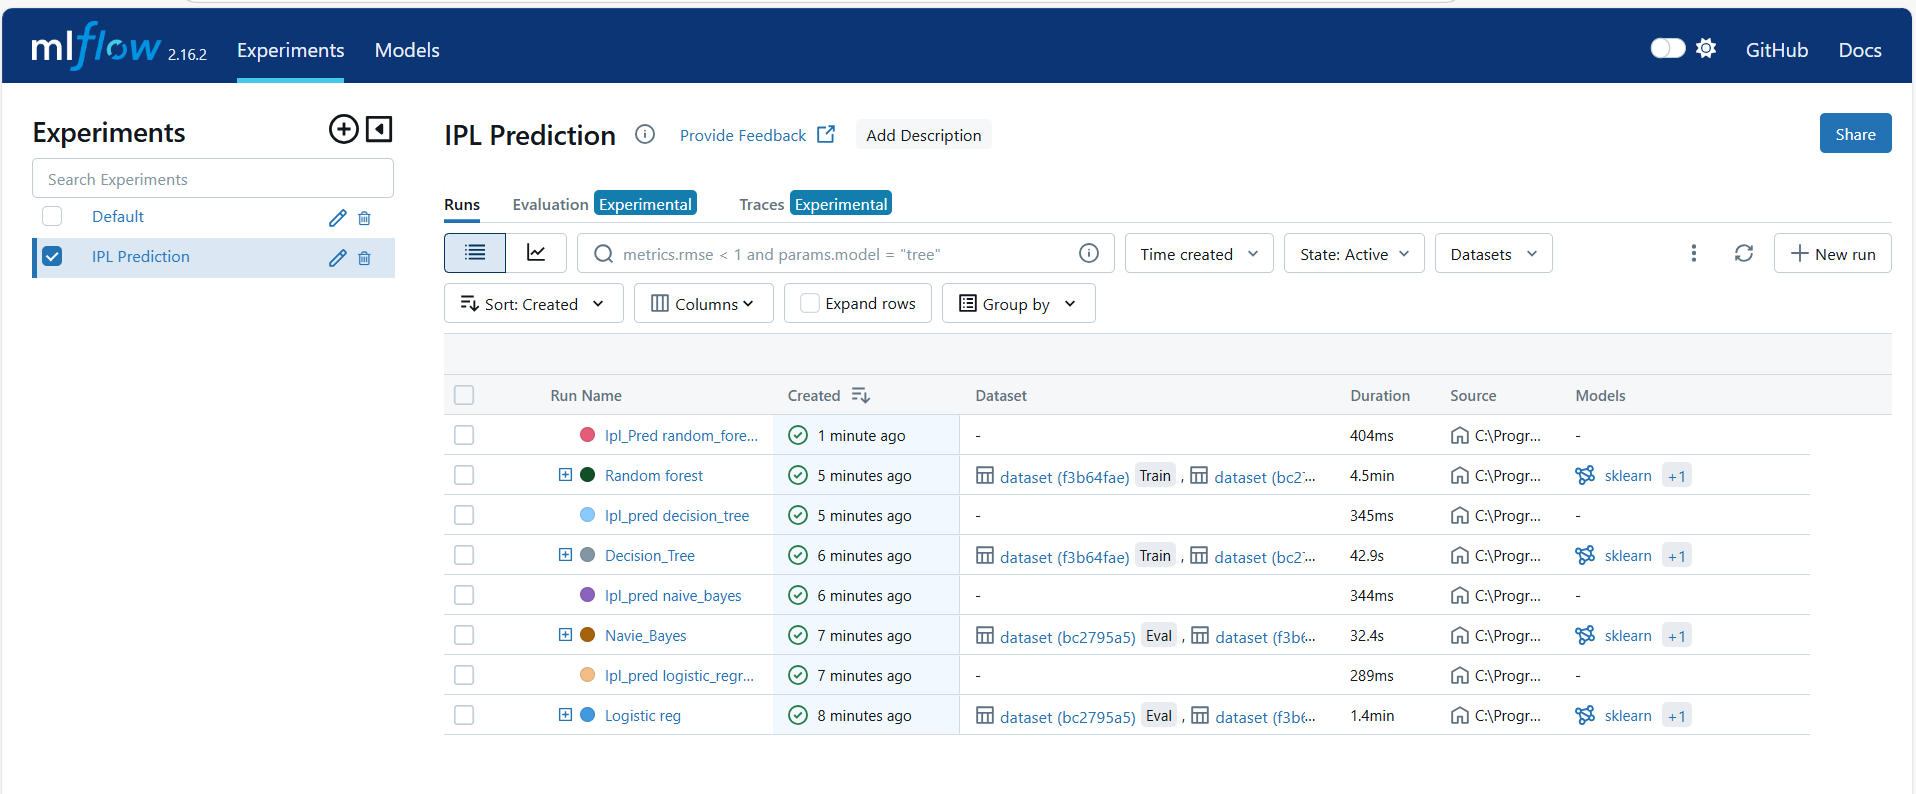

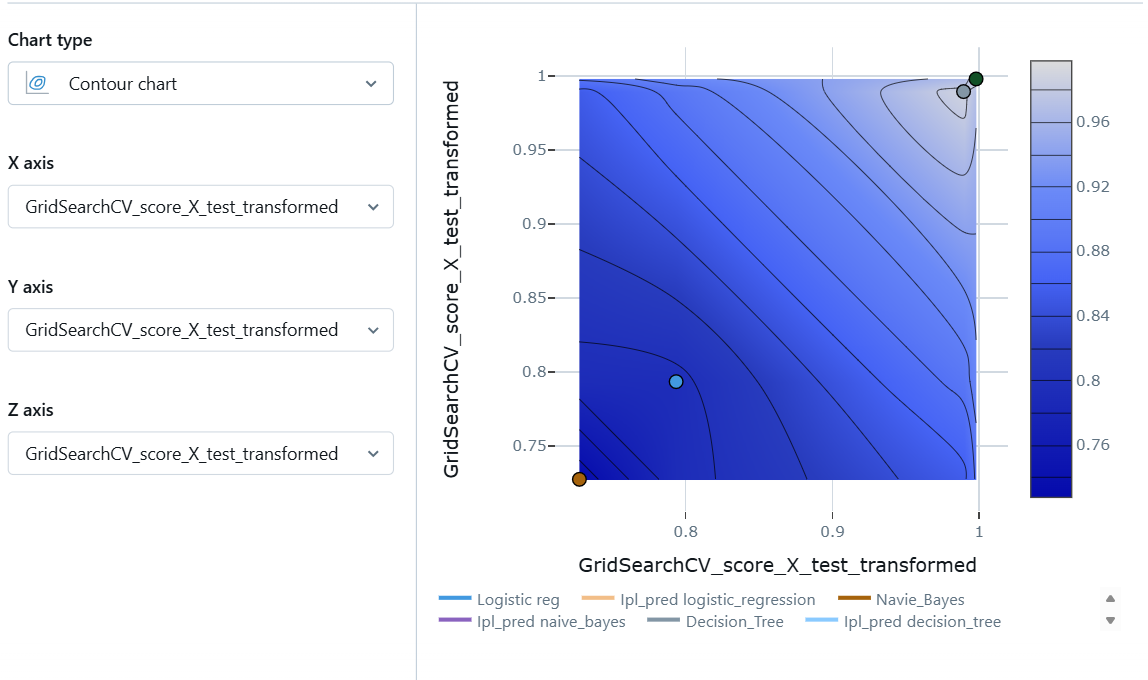

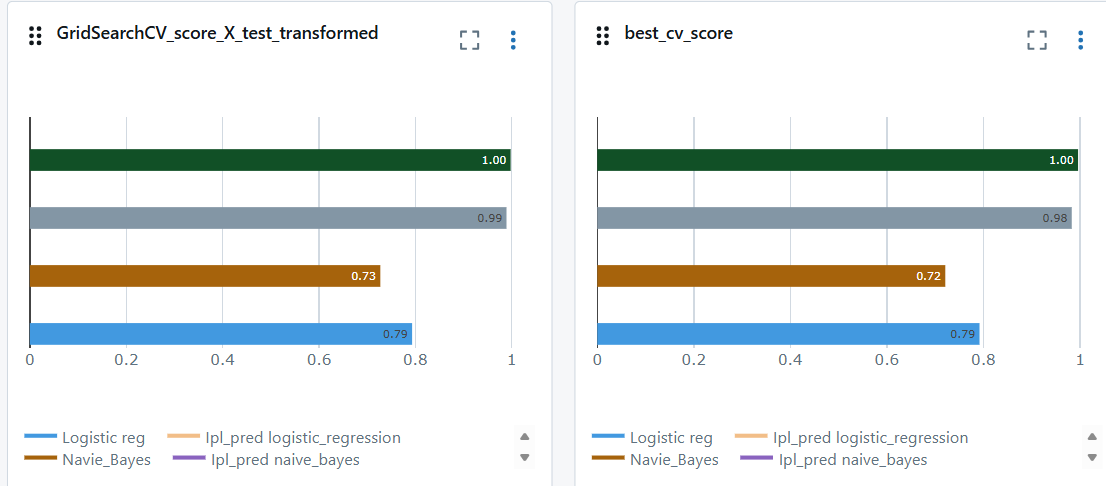

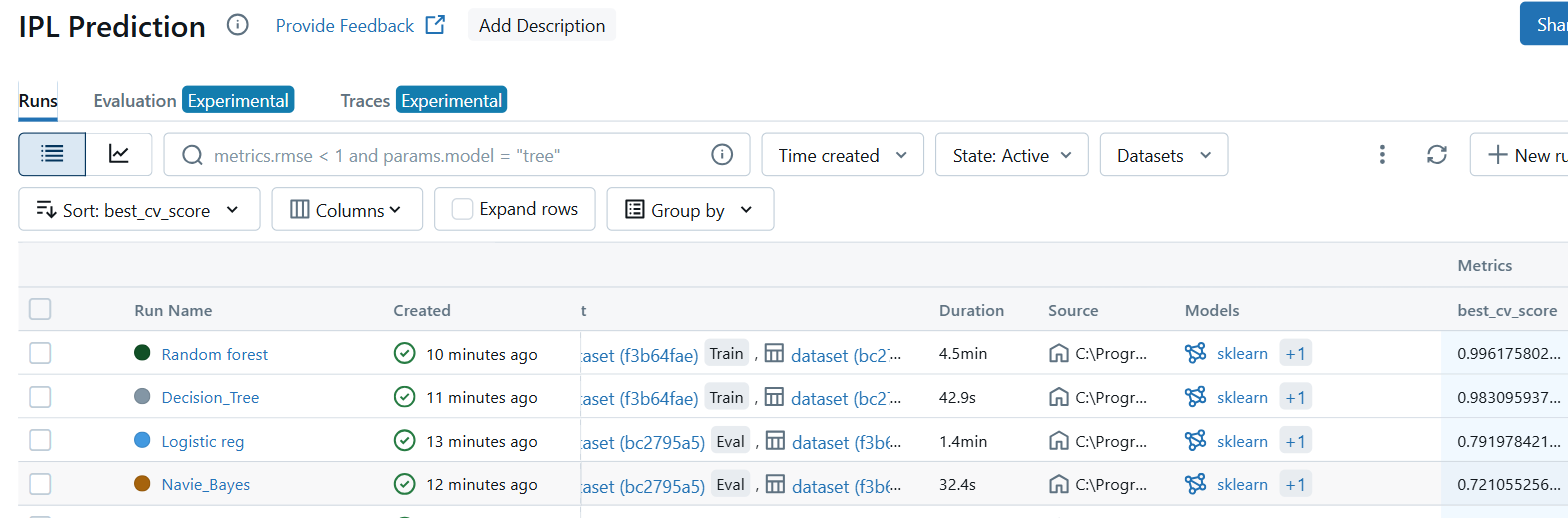

## Deep Learning Model Training and Logging with MLflow: 
* Defines and trains a deep neural network model for binary classification, incorporating early stopping, batch normalization, and dropout, with the model and metrics logged to MLflow for tracking and deployment.

In [44]:
import mlflow
import mlflow.keras
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, f1_score

# MLflow setup
mlflow.set_experiment("Model_Training_Experiment")

# Start MLflow run
with mlflow.start_run(run_name="Training_Run"):
    
    # Define the Sequential model
    model = models.Sequential()

    # Input Layer - update the input shape to 55 (since you have 55 features)
    model.add(layers.InputLayer(input_shape=(55,)))  # 55 features

    # Hidden Layers with neurons and dropout
    neurons_per_layer = [32, 28, 25, 20, 16, 12, 10, 8]
    for neurons in neurons_per_layer:
        model.add(layers.Dense(units=neurons, activation='relu', kernel_initializer='he_normal', use_bias=True))  # Weight Init + Bias
        model.add(layers.BatchNormalization())  # Batch Normalization
        model.add(layers.Dropout(rate=0.1))  # Dropout to prevent overfitting

    # Output Layer for binary classification
    model.add(layers.Dense(1, activation='relu'))  # 'relu' used for output layer

    # Compile the model with Adam optimizer and learning rate of 0.1
    optimizer = Adam(learning_rate=0.1)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Log model summary to MLflow
    model.summary(print_fn=lambda x: mlflow.log_text(x, "model_summary.txt"))

    # Early stopping setup
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model
    history = model.fit(X_train_transformed, y_train, validation_data=(X_test_transformed, y_test), epochs=50, batch_size=32, callbacks=[early_stopping])


    # Predict using the model (for test/validation data)
    y_test_pred = (model.predict(X_test_transformed) > 0.5).astype("int32")  # Binary predictions (0 or 1)

    # Evaluate the model using accuracy
    accuracy = accuracy_score(y_test, y_test_pred)
    print("Test Accuracy:", accuracy)

    

    # Log model to MLflow
    mlflow.keras.log_model(model, "model")

    print("Model logged and saved successfully to MLflow.")


Epoch 1/50
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 44s 12ms/step - accuracy: 0.5317 - loss: 7.0759 - val_accuracy: 0.5715 - val_loss: 6.8274
Epoch 2/50
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.5969 - loss: 6.3625 - val_accuracy: 0.6415 - val_loss: 5.7568
Epoch 3/50
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.5974 - loss: 6.4082 - val_accuracy: 0.5133 - val_loss: 7.7617
Epoch 4/50
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.5343 - loss: 7.4240 - val_accuracy: 0.5303 - val_loss: 7.4884
Epoch 5/50
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.5344 - loss: 7.4265 - val_accuracy: 0.5404 - val_loss: 7.3275
Epoch 6/50
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 43s 13ms/step - accuracy: 0.5545 - loss: 7.1030 - val_accuracy: 0.5303 - val_loss: 7.4877
Epoch 7/50
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.5378 - loss: 7.3705 - val_accuracy: 0.5287 - val_loss: 7.5140
564/564 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


2024/09/29 00:11:32 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.


Test Accuracy: 0.6414676051654381


2024/09/29 00:12:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/09/29 00:12:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run Training_Run at: http://127.0.0.1:5000/#/experiments/142028550761552599/runs/26f117f1d7aa4b1faf1e584e0bc56b7e.
2024/09/29 00:12:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/142028550761552599.


Model logged and saved successfully to MLflow.


## Deep Neural Network with Multiple Layers for Binary Classification: 
* Defines a deep neural network model with 8 hidden layers, using ReLU activation, batch normalization, dropout, and an output layer for binary classification. The model is compiled with Adam optimizer and early stopping for preventing overfitting.








In [52]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import keras.backend as K


# Create a Sequential model
model = models.Sequential()

# Input Layer
model.add(layers.InputLayer(input_shape=(55,)))  # 9 features

# Hidden Layers with specified neurons and use_bias=True
model.add(layers.Dense(units=32, activation='relu', kernel_initializer='he_normal', use_bias=True))  # First hidden layer
model.add(layers.BatchNormalization())  # Batch Normalization
model.add(layers.Dropout(rate=0.1))  # Dropout with rate 0.1

model.add(layers.Dense(units=28, activation='relu', kernel_initializer='he_normal', use_bias=True))  # Second hidden layer
model.add(layers.BatchNormalization())
model.add(layers.Dropout(rate=0.1))

model.add(layers.Dense(units=25, activation='relu', kernel_initializer='he_normal', use_bias=True))  # Third hidden layer
model.add(layers.BatchNormalization())
model.add(layers.Dropout(rate=0.1))

model.add(layers.Dense(units=20, activation='relu', kernel_initializer='he_normal', use_bias=True))  # Fourth hidden layer
model.add(layers.BatchNormalization())
model.add(layers.Dropout(rate=0.1))

model.add(layers.Dense(units=16, activation='relu', kernel_initializer='he_normal', use_bias=True))  # Fifth hidden layer
model.add(layers.BatchNormalization())
model.add(layers.Dropout(rate=0.1))

model.add(layers.Dense(units=12, activation='relu', kernel_initializer='he_normal', use_bias=True))  # Sixth hidden layer
model.add(layers.BatchNormalization())
model.add(layers.Dropout(rate=0.1))

model.add(layers.Dense(units=10, activation='relu', kernel_initializer='he_normal', use_bias=True))  # Seventh hidden layer
model.add(layers.BatchNormalization())
model.add(layers.Dropout(rate=0.1))

model.add(layers.Dense(units=8, activation='relu', kernel_initializer='he_normal', use_bias=True))  # Eighth hidden layer
model.add(layers.BatchNormalization())
model.add(layers.Dropout(rate=0.1))

# Output Layer (For Binary Classification, use activation='relu' as requested)
model.add(layers.Dense(1, activation='relu'))  # Output for binary classification

# Compile the model with custom F1 score and learning rate
optimizer = Adam(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Model Summary
model.summary()

# Example: Model Training
# Assuming x_train_transformed and y_train are your training data
# history = model.fit(x_train_transformed, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stopping])


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_72 (Dense)                     │ (None, 32)                  │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_64               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_64 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 28)                  │             924 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_65               │ (None, 28)                  │             112 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_65 (Dropout)                 │ (None, 28)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_74 (Dense)                     │ (None, 25)                  │             725 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_66               │ (None, 25)                  │             100 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_66 (Dropout)                 │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_75 (Dense)                     │ (None, 20)                  │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_67               │ (None, 20)                  │              80 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_67 (Dropout)                 │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_76 (Dense)                     │ (None, 16)                  │             336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_68               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_68 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (None, 12)                  │             204 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_69               │ (None, 12)                  │              48 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_69 (Dropout)                 │ (None, 12)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 5,332 (20.83 KB)

 Trainable params: 5,030 (19.65 KB)

 Non-trainable params: 302 (1.18 KB)

## Training a Deep Neural Network with Early Stopping and Accuracy Evaluation

In [53]:
# Early stopping setup
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train_transformed, y_train, validation_data=(X_test_transformed, y_test), epochs=50, batch_size=32, callbacks=[early_stopping])

# Predict using the model (for test/validation data)
y_test_pred = (model.predict(X_test_transformed) > 0.5).astype("int32")  # Binary predictions (0 or 1)

# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", accuracy)


Epoch 1/50
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 43s 12ms/step - accuracy: 0.5230 - loss: 7.2072 - val_accuracy: 0.5962 - val_loss: 6.4856
Epoch 2/50
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.5777 - loss: 6.7433 - val_accuracy: 0.5470 - val_loss: 7.2921
Epoch 3/50
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.5303 - loss: 7.5203 - val_accuracy: 0.5137 - val_loss: 7.7544
Epoch 4/50
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.5062 - loss: 7.8900 - val_accuracy: 0.6705 - val_loss: 5.2660
Epoch 5/50
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.6232 - loss: 6.0239 - val_accuracy: 0.6925 - val_loss: 4.9409
Epoch 6/50
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.6264 - loss: 5.9838 - val_accuracy: 0.6976 - val_loss: 4.8482
Epoch 7/50
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.6485 - loss: 5.6339 - val_accuracy: 0.7219 - val_loss: 4.4591
Epoch 8/50
1692/1692 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.6794 -

## Training and Evaluating a Random Forest Model with Accuracy and Classification Report

In [54]:
# Step 1: Import Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV



# Step 4: Train the Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_transformed, y_train)

# Step 5: Evaluate the Model
y_pred = rf_model.predict(X_test_transformed)

# Print Classification Report and Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")



Confusion Matrix:
[[8426   23]
 [  19 9575]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8449
           1       1.00      1.00      1.00      9594

    accuracy                           1.00     18043
   macro avg       1.00      1.00      1.00     18043
weighted avg       1.00      1.00      1.00     18043

Accuracy: 0.9976722274566314


## Saving the Trained Random Forest Model with joblib

In [46]:
import joblib

# Save the model
joblib.dump(rf_model, 'random_forest_model.joblib')

['random_forest_model.joblib']

## Loading and Using the Trained Random Forest Model for Predictions

In [47]:
import joblib

# Load the model from the file
loaded_model = joblib.load('random_forest_model.joblib')

# Now you can use `loaded_model` to make predictions
predictions = loaded_model.predict(X_test_transformed)

## Saving the Random Forest Model to a Specified Path

In [49]:
model_path = r'C:\Users\mdimr\random_forest_model.joblib'  # Use a raw string to handle backslashes

# Save the model
joblib.dump(rf_model, model_path)
print(f"Model saved to {model_path}")

Model saved to C:\Users\mdimr\random_forest_model.joblib


## Loading the Random Forest Model from a Specified Path

In [50]:
import joblib
import os

# Specify the model path
model_path = r'C:\Users\mdimr\random_forest_model.joblib'

# Check if the model file exists before loading
if os.path.exists(model_path):
    loaded_model = joblib.load(model_path)
    print("Model loaded successfully!")
    # Example: Make predictions (if you have test data)
    # predictions = loaded_model.predict(X_test)
else:
    print(f"Model file not found: {model_path}")


Model loaded successfully!


## Saving and Loading Models for Consistent Performance

* **Saving the StandardScaler, OneHotEncoder, and RandomForest model because the RandomForest achieved the best accuracy among all models.** 
* This allows you to easily load and reuse the models for future predictions without retraining, ensuring efficient and consistent performance.

In [52]:
import pickle

In [57]:
from pickle import dump

dump(std_scaler, open(r"C:\Users\mdimr\Downloads\Ipl pred\standardscaler.pkl", 'wb'))

dump(onehot_encoder, open(r"C:\Users\mdimr\Downloads\Ipl pred\one_hotencoder.pkl", 'wb'))
dump(rf_model, open(r"C:\Users\mdimr\Downloads\Ipl pred\randomforest.pkl", 'wb'))

In [58]:
from pickle import load

load(open(r"C:\Users\mdimr\Downloads\Ipl pred\standardscaler.pkl", 'rb'))

load(open(r"C:\Users\mdimr\Downloads\Ipl pred\one_hotencoder.pkl", 'rb'))
load(open(r"C:\Users\mdimr\Downloads\Ipl pred\randomforest.pkl", 'rb'))


RandomForestClassifier(random_state=42)